In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [3]:
file_path = os.path.abspath('cz_centroids.csv')
cz_df = pd.read_csv(file_path)
cz_df.head()

,cz,lat,lon
0,302,36.030422,-84.188034
1,500,36.240593,-79.647057
2,900,35.104691,-80.639771
3,1400,35.005943,-79.398834
4,1701,35.857998,-78.821869


In [4]:
file_path2 = os.path.abspath('od_counts.csv')
od_counts_df = pd.read_csv(file_path2)
od_counts_df.head()

,o_cz,d_cz,n,o_name,d_name
0,3300,302,94,New Orleans,Knoxville
1,1400,302,73,Fayetteville,Knoxville
2,2400,302,81,Richmond,Knoxville
3,4200,302,43,Little Rock,Knoxville
4,31201,302,55,Austin,Knoxville


# Question 1.1

In [5]:
# Steps: (1) compute conditional probability of an individual being in the destination given their origin
# (2) create a table of 10 commuting zones with highest conditional probabilities (stay rates)

# group the data by o_cz and sum the counts
origin_totals = od_counts_df.groupby('o_cz')['n'].sum().reset_index()
origin_totals.rename(columns={'n': 'o_n'}, inplace=True) # rename column
origin_totals.head()

,o_cz,o_n
0,302,66575
1,500,101464
2,900,155097
3,1400,62336
4,1701,142989


In [6]:
od_counts_df = od_counts_df.merge(origin_totals, on='o_cz') # merge back into od_counts_df
od_counts_df.head()

,o_cz,d_cz,n,o_name,d_name,o_n
0,3300,302,94,New Orleans,Knoxville,140338
1,3300,500,38,New Orleans,Greensboro,140338
2,3300,900,188,New Orleans,Charlotte,140338
3,3300,1400,90,New Orleans,Fayetteville,140338
4,3300,1701,154,New Orleans,Raleigh,140338


In [7]:
od_counts_df['Pd_o'] = od_counts_df['n'] / od_counts_df['o_n'] #create new column with conditional prob of staying in origin CZ
od_counts_df.head()

,o_cz,d_cz,n,o_name,d_name,o_n,Pd_o
0,3300,302,94,New Orleans,Knoxville,140338,0.000670
1,3300,500,38,New Orleans,Greensboro,140338,0.000271
2,3300,900,188,New Orleans,Charlotte,140338,0.001340
3,3300,1400,90,New Orleans,Fayetteville,140338,0.000641
4,3300,1701,154,New Orleans,Raleigh,140338,0.001097


In [8]:
# create the table with only top 10 stay rates
od_counts_df_highest_stayrates = od_counts_df[['o_name', 'Pd_o']].sort_values(by='Pd_o', ascending=False).head(10)
od_counts_df_highest_stayrates.rename(columns={'o_name': 'cz_name', 'Pd_o': 'stay_rate'}, inplace=True)
od_counts_df_highest_stayrates

,cz_name,stay_rate
8734,Louisville,0.868634
5912,Lafayette,0.853010
9525,Birmingham,0.845985
5679,Oklahoma City,0.844993
6660,Minneapolis,0.841369
313,Little Rock,0.838652
3111,Baton Rouge,0.835923
5895,Los Angeles,0.834705
6515,Nashville,0.834410
9876,Houston,0.831507


## Question 1.2

In [9]:
od_counts_df.head()

,o_cz,d_cz,n,o_name,d_name,o_n,Pd_o
0,3300,302,94,New Orleans,Knoxville,140338,0.000670
1,3300,500,38,New Orleans,Greensboro,140338,0.000271
2,3300,900,188,New Orleans,Charlotte,140338,0.001340
3,3300,1400,90,New Orleans,Fayetteville,140338,0.000641
4,3300,1701,154,New Orleans,Raleigh,140338,0.001097


In [10]:
cz_df.head()

,cz,lat,lon
0,302,36.030422,-84.188034
1,500,36.240593,-79.647057
2,900,35.104691,-80.639771
3,1400,35.005943,-79.398834
4,1701,35.857998,-78.821869


In [11]:
# Merge cz df on the origin cz
od_origin = pd.merge(od_counts_df, cz_df, left_on='o_cz', right_on='cz', how='left')
od_origin.rename(columns={'lat': 'o_lat', 'lon': 'o_lon'}, inplace=True)
od_origin

,o_cz,d_cz,n,o_name,d_name,o_n,Pd_o,cz,o_lat,o_lon
0,3300,302,94,New Orleans,Knoxville,140338,0.000670,3300,30.073698,-90.16420
1,3300,500,38,New Orleans,Greensboro,140338,0.000271,3300,30.073698,-90.16420
2,3300,900,188,New Orleans,Charlotte,140338,0.001340,3300,30.073698,-90.16420
3,3300,1400,90,New Orleans,Fayetteville,140338,0.000641,3300,30.073698,-90.16420
4,3300,1701,154,New Orleans,Raleigh,140338,0.001097,3300,30.073698,-90.16420
...,...,...,...,...,...,...,...,...,...,...
9995,38801,38300,3415,Portland,Los Angeles,179619,0.019012,38801,45.641350,-122.58557
9996,38801,38601,900,Portland,Spokane,179619,0.005011,38801,45.641350,-122.58557
9997,38801,38801,137254,Portland,Portland,179619,0.764140,38801,45.641350,-122.58557
9998,38801,38901,6938,Portland,Eugene,179619,0.038626,38801,45.641350,-122.58557


In [12]:
# Merge the cz df for the destination cz
od_all = pd.merge(od_origin, cz_df, left_on='d_cz', right_on='cz', how='left')
od_all.rename(columns={'lat': 'd_lat', 'lon': 'd_lon'}, inplace=True)
od_all

,o_cz,d_cz,n,o_name,d_name,o_n,Pd_o,cz_x,o_lat,o_lon,cz_y,d_lat,d_lon
0,3300,302,94,New Orleans,Knoxville,140338,0.000670,3300,30.073698,-90.16420,302,36.030422,-84.188034
1,3300,500,38,New Orleans,Greensboro,140338,0.000271,3300,30.073698,-90.16420,500,36.240593,-79.647057
2,3300,900,188,New Orleans,Charlotte,140338,0.001340,3300,30.073698,-90.16420,900,35.104691,-80.639771
3,3300,1400,90,New Orleans,Fayetteville,140338,0.000641,3300,30.073698,-90.16420,1400,35.005943,-79.398834
4,3300,1701,154,New Orleans,Raleigh,140338,0.001097,3300,30.073698,-90.16420,1701,35.857998,-78.821869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38801,38300,3415,Portland,Los Angeles,179619,0.019012,38801,45.641350,-122.58557,38300,34.022720,-117.162060
9996,38801,38601,900,Portland,Spokane,179619,0.005011,38801,45.641350,-122.58557,38601,47.771835,-117.025380
9997,38801,38801,137254,Portland,Portland,179619,0.764140,38801,45.641350,-122.58557,38801,45.641350,-122.585570
9998,38801,38901,6938,Portland,Eugene,179619,0.038626,38801,45.641350,-122.58557,38901,44.695087,-123.096670


In [13]:
# Drop the redundant columns
# n is number of movers from o_cz to d_cz
# Pd_o is stay rate
od_all.drop(columns=['cz_x', 'cz_y'], inplace=True)
od_all

,o_cz,d_cz,n,o_name,d_name,o_n,Pd_o,o_lat,o_lon,d_lat,d_lon
0,3300,302,94,New Orleans,Knoxville,140338,0.000670,30.073698,-90.16420,36.030422,-84.188034
1,3300,500,38,New Orleans,Greensboro,140338,0.000271,30.073698,-90.16420,36.240593,-79.647057
2,3300,900,188,New Orleans,Charlotte,140338,0.001340,30.073698,-90.16420,35.104691,-80.639771
3,3300,1400,90,New Orleans,Fayetteville,140338,0.000641,30.073698,-90.16420,35.005943,-79.398834
4,3300,1701,154,New Orleans,Raleigh,140338,0.001097,30.073698,-90.16420,35.857998,-78.821869
...,...,...,...,...,...,...,...,...,...,...,...
9995,38801,38300,3415,Portland,Los Angeles,179619,0.019012,45.641350,-122.58557,34.022720,-117.162060
9996,38801,38601,900,Portland,Spokane,179619,0.005011,45.641350,-122.58557,47.771835,-117.025380
9997,38801,38801,137254,Portland,Portland,179619,0.764140,45.641350,-122.58557,45.641350,-122.585570
9998,38801,38901,6938,Portland,Eugene,179619,0.038626,45.641350,-122.58557,44.695087,-123.096670


# Question 1.3

In [14]:
# Function to calculate as-the-crow-flies distance in miles
def dist_calc(o_lat, o_lon, d_lat, d_lon):
    lat_diff = (d_lat - o_lat) * 69.2  # One degree of latitude = 69.2 miles
    lon_diff = (d_lon - o_lon) * 54.6  # One degree of longitude = 54.6 miles
    distance = np.sqrt(lat_diff**2 + lon_diff**2)  # Pythagorean theorem to find distance
    return distance

In [15]:
# Apply the function to the dataset to calculate distances for each origin-destination pair
od_all['dist'] = od_all.apply(lambda row: dist_calc(row['o_lat'], row['o_lon'], row['d_lat'], row['d_lon']), axis=1)
od_all.head()

,o_cz,d_cz,n,o_name,d_name,o_n,Pd_o,o_lat,o_lon,d_lat,d_lon,dist
0,3300,302,94,New Orleans,Knoxville,140338,0.000670,30.073698,-90.1642,36.030422,-84.188034,525.722387
1,3300,500,38,New Orleans,Greensboro,140338,0.000271,30.073698,-90.1642,36.240593,-79.647057,715.445187
2,3300,900,188,New Orleans,Charlotte,140338,0.001340,30.073698,-90.1642,35.104691,-80.639771,625.811410
3,3300,1400,90,New Orleans,Fayetteville,140338,0.000641,30.073698,-90.1642,35.005943,-79.398834,679.697969
4,3300,1701,154,New Orleans,Raleigh,140338,0.001097,30.073698,-90.1642,35.857998,-78.821869,737.387689


# Question 1.4

#### part a: 20 ventiles based on dist and take avg val of pd_o and dist in each ventile

In [16]:
od_all['ventile'] = pd.qcut(od_all['dist'], 20, labels=False) + 1  # create 20 bins
od_all.head()

,o_cz,d_cz,n,o_name,d_name,o_n,Pd_o,o_lat,o_lon,d_lat,d_lon,dist,ventile
0,3300,302,94,New Orleans,Knoxville,140338,0.000670,30.073698,-90.1642,36.030422,-84.188034,525.722387,6
1,3300,500,38,New Orleans,Greensboro,140338,0.000271,30.073698,-90.1642,36.240593,-79.647057,715.445187,8
2,3300,900,188,New Orleans,Charlotte,140338,0.001340,30.073698,-90.1642,35.104691,-80.639771,625.811410,7
3,3300,1400,90,New Orleans,Fayetteville,140338,0.000641,30.073698,-90.1642,35.005943,-79.398834,679.697969,8
4,3300,1701,154,New Orleans,Raleigh,140338,0.001097,30.073698,-90.1642,35.857998,-78.821869,737.387689,8


In [17]:
# Compute the average of Pd_o and dist within each ventile
ventile_means = od_all.groupby('ventile').agg({
    'Pd_o': 'mean', #compute means
    'dist': 'mean'
}).reset_index()

#### part b: scatterplot of mean Pd_o against mean dist

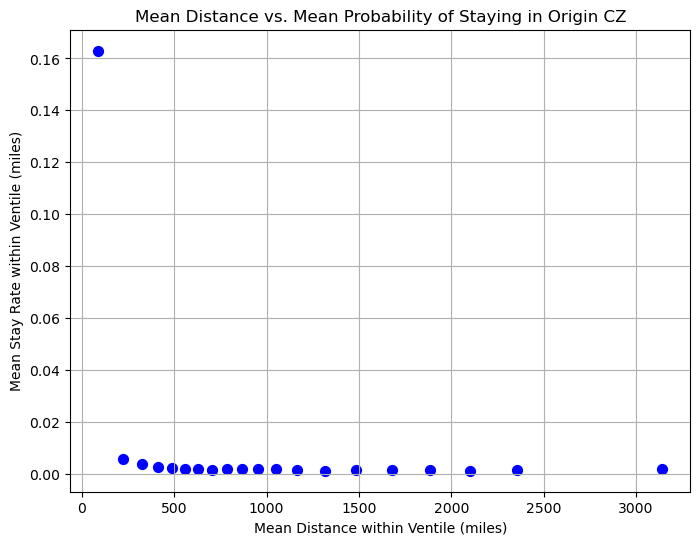

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(ventile_means['dist'], ventile_means['Pd_o'], color='blue', s=50)

plt.xlabel('Mean Distance within Ventile (miles)')
plt.ylabel('Mean Stay Rate within Ventile (miles)')
plt.title('Mean Distance vs. Mean Probability of Staying in Origin CZ')

plt.grid(True)
plt.show()

# Question 1.5

In [19]:
X = od_all['dist']
y = od_all['Pd_o']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() # Run linear regression

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Pd_o   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     250.9
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           7.84e-56
Time:                        07:14:18   Log-Likelihood:                 11911.
No. Observations:               10000   AIC:                        -2.382e+04
Df Residuals:                    9998   BIC:                        -2.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0263      0.001     20.795      0.000       0.024       0.029
dist       -1.467e-05   9.26e-07    -15.840      0.000   -1.65e-05   -1.29e-05
==============================================================================
Omnibus:                    15138.804   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4063518.071
Skew:                           9.764   Prob(JB):                         0.00
Kurtosis:                      99.804   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Part A: Assume for a moment that this regression captures a causal relationship between distance and probability of migration. How should we interpret the coefficient on dist? How should we interpret the R2 of the regression?

The coefficient on distance is $−1.467 * 10^{-5}$.
The standard error on distance is $9.26 * 10^{-7}$.
The R-squared value is 0.024.

For every additional mile of distance between the origin and destination CZs, the probability that an individual remains in their original community zone decreases by 0.001467%. This small coefficient suggests that distance alone does not play a large role in determining movement between CZs.

The $R^2$ value indicates that 2.4% of variation in the stay rate is explained by distance between origin and destination CZs. This is a relatively low $R^2$ value, and it suggests that very little of the variability in the probability of staying in the origin CZ is explained by distance alone. I hypothesize that including observations where d=o could distort the results.

#### Part B: Run the regression separately for the top 50 most populous origins and the bottom 50 most populous among the top 100 (but keep all destinations in the regressions). Do the resulting regression coefficients differ?

In [21]:
# Find total number of people moving from each origin CZ
o_pop = od_all.groupby('o_cz')['o_n'].first().sort_values(ascending=False).reset_index()

In [23]:
# Split the data into top 50 and bottom 50 most populous origins
top_50_origins = o_pop['o_cz'].head(50).tolist()
bottom_50_origins = o_pop['o_cz'].tail(50).tolist()

In [29]:
# Create the two subsets
top_50_df = od_all[od_all['o_cz'].isin(top_50_origins)]
bottom_50_df = od_all[od_all['o_cz'].isin(bottom_50_origins)]

In [30]:
X_top = top_50_df['dist']
y_top = top_50_df['Pd_o']
X_top = sm.add_constant(X_top)
model_top = sm.OLS(y_top, X_top).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Pd_o   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     250.9
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           7.84e-56
Time:                        07:33:52   Log-Likelihood:                 11911.
No. Observations:               10000   AIC:                        -2.382e+04
Df Residuals:                    9998   BIC:                        -2.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0263      0.001     20.795      0.000       0.024       0.029
dist       -1.467e-05   9.26e-07    -15.840      0.000   -1.65e-05   -1.29e-05
==============================================================================
Omnibus:                    15138.804   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4063518.071
Skew:                           9.764   Prob(JB):                         0.00
Kurtosis:                      99.804   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X_bottom = bottom_50_df['dist']
y_bottom = bottom_50_df['Pd_o']
X_bottom = sm.add_constant(X_bottom)
model_bottom = sm.OLS(y_bottom, X_bottom).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Pd_o   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     250.9
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           7.84e-56
Time:                        07:34:02   Log-Likelihood:                 11911.
No. Observations:               10000   AIC:                        -2.382e+04
Df Residuals:                    9998   BIC:                        -2.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0263      0.001     20.795      0.000       0.024       0.029
dist       -1.467e-05   9.26e-07    -15.840      0.000   -1.65e-05   -1.29e-05
==============================================================================
Omnibus:                    15138.804   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4063518.071
Skew:                           9.764   Prob(JB):                         0.00
Kurtosis:                      99.804   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The resulting regression coefficients do not differ, which is not what I would expect.

#### Part C: In light of the findings from previous questions/subparts of this question, do you think this regression was a good model for the underlying data generating process? Justify your answer, and if you think it is not a good model, briefly describe a model you think would be better.

I do not think that this model was the best choice for the data. First of all, the $R^2$ value for the regression was very low, shwoing that only 2.4% of variation in Pd_o was explained by the dist variable. Even when splitting the data into top 50 and bottom 50 origins, the results did not change, which I would not have expected. Second, the coefficient on dist was very small and almost 0, which shows that the model may not be capturing the true effect.

Since the data seems to be poorly represented by a linear regression model, a better model might be to use a log model. This model could better capture the way small distances could have a much larger impact on stay rates, and this impact decreases at an increasing rate as distance becomes larger.

# Question 2.1

#### Part a
For an individual to want to commit a crime, they would want the probability of $b_i$ to be greater than $pc$. Since $b_i$ is uniformly distributed, $b_i$ has the same chance of falling anywhere between 0 and 1. So, the share of individuals who will commit a crime in the status quo is 1 - $pc$. 

#### Part b
The share of individuals caught committing a crime is $p(1-pc)$. This is just the share of individuals who will commit a crime in the status quo multiplied by the probability of being caught $p$.

#### Part c
The change in the share of individuals who commit a crime with respect to an increase in the cost of punishment $dc$ can be calculated by taking the derivative of the share of individuals committing a crime with respect to cost $c$, which gives us $-p$. This means that as cost of punishment increases, the share of individuals committing a crime decreases.

The change in the share of individuals who are caught committing a crime is $-p^2$. This means that as cost of punishment increases, the share of individuals who are caught committing a crime decreases at a quadratic rate.

#### Part d
If I know $p$ and $c$, I would not have enough information to compute the numerator of the MVPF (recipients' willingness to pay for policy change). I would also need information about the distribution of the utility that individuals gain from committing a crime $b_i$ since that would play a role in how much the likelihood of committing crimes would change from implementing policy.

# Question 2.2

#### Part a
The cost to the government of this policy in the status quo is $p(1-pc)c$, which is the share of individuals caught commiting a crime multiplied by the fine that the government collects.

#### Part b
The change in the cost to the government with respect to cost of punishment is $p(1-2pc)$, which I got from taking the derivative of the expression in part 2.2a.

#### Part c

If I know $p$ and $c$, I do not believe that I have enough information to compute the denominator of the MVPF. The effect of the policy change on long-run cost to government includes direct costs of implementing and enforcing the policy, indirect costs such as changes in property values, and behavioral impacts. I would need parameters that detail how the policy impacts crime and social welfare costs, which are effects that extend beyond the direct costs mentioned in the question. It would also be helpful to have data on how sensitive criminals are to changes in fines, which could play a big role in determining the long-run costs to government.